In [2]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
%matplotlib inline

d:\measuring\data
reloaded
d:\measuring\data


In [10]:
folder= tb.latest_data('')
#folder= tb.latest_data('122849'); print 'OLDER FOLDER !!!'
#folder=r'D:\measuring\data\20140918\122229_ElectronRabi_Pippin_rabi'
#ssro_folder = tb.latest_data('155255_AdwinSSRO_SSROCalibration_Pippin_SIL3') #tb.data_from_time('20140708183041')
ssro_folder = tb.latest_data('SSRO')
a=sequence.SequenceAnalysis(folder)
#test =a.get_sweep_pts()
#print a.get_readout_results(name='ssro')
a.get_electron_ROC(ssro_calib_folder=ssro_folder)
ax = a.plot_result_vs_sweepparam(ret='ax', name='ssro')
ax.set_ylim(.0,1.1)
ax.set_xlim(0,50)
print a.sweep_pts
#y=a.p0
#np.savetxt('rabi_2.txt', (x,y))

d:\measuring\data\20151215\101954_AdwinSSRO_SSROCalibration_Pippin_SIL1


AttributeError: SequenceAnalysis instance has no attribute 'normalized_ssro'

ORLDER FOLDER !!!


<bound method AxesSubplot.set of <matplotlib.axes.AxesSubplot object at 0x09C49690>>

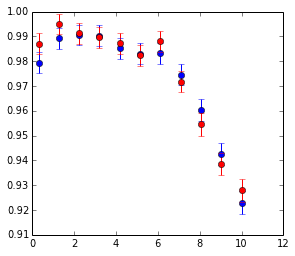

In [6]:
stfolder_1= tb.latest_data('110106')
folder_2= tb.latest_data('105928'); print 'ORLDER FOLDER !!!'
#folder=r'D:\measuring\data\20140707\142326_DD_CORPSE_Sam_SIL5'
ssro_folder = tb.latest_data('SSROCalibration') #tb.data_from_time('20140708183041')
a_1=sequence.SequenceAnalysis(folder_1)
a_1.get_sweep_pts()
a_1.get_readout_results(name='ssro')
a_1.get_electron_ROC(ssro_calib_folder=ssro_folder)
a_2=sequence.SequenceAnalysis(folder_2)
a_2.get_sweep_pts()
a_2.get_readout_results(name='ssro')
a_2.get_electron_ROC(ssro_calib_folder=ssro_folder)
x_1= a_1.sweep_pts
y_1 = a_1.p0
x_2= a_2.sweep_pts
y_2= a_2.p0
fig_0, ax_0 = plt.subplots(1,1, figsize=(4.5,4))
#ax = plt.plot(x_1, y_1,'bo', x_2, y_2,'ro')
ax_0.errorbar(x_1, y_1, yerr = a_1.u_p0, fmt='bo')
ax_0.errorbar(x_2, y_2, yerr = a_2.u_p0, fmt='ro' )
ax_0.set

In [1]:
execfile(r'D:\measuring\analysis\scripts\espin\electron_rabi_analysis.py')

ImportError: No module named analysis.lib

<analysis.lib.m2.ssro.sequence.SequenceAnalysis instance at 0x09DDD328>
Converged with chi squared  0.072494481393
degrees of freedom, dof  18
RMS of residuals (i.e. sqrt(chisq/dof))  0.0634623604076
Reduced chisq (i.e. variance of residuals)  0.0040274711885

fitted parameters at minimum, with 68% C.I.:
 0 f              8.538574 +/-   0.849084
 1 A              0.086179 +/-   0.019793
 2 o              0.930955 +/-   0.027427

correlation matrix:
               f         A         o         
         f  1.000000
         A  0.197651  1.000000
         o  0.197639  0.862715  1.000000

pi pulse = 0.059 MW_pulse_amplitudes (V)


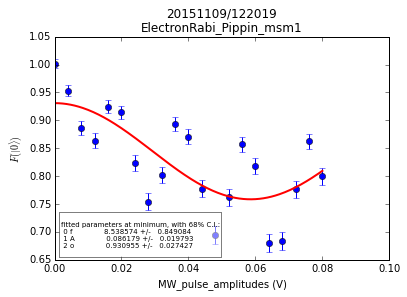

In [5]:
import os, sys
import numpy as np
import h5py
import logging

from matplotlib import pyplot as plt

from analysis.lib import fitting
from analysis.lib.m2.ssro import  sequence, mbi #sequence_ssro,
from analysis.lib.tools import toolbox
from analysis.lib.fitting import fit, rabi
reload(rabi)
reload(sequence)

from analysis.lib.tools import plot

guess_frq = 1./0.12

guess_amp = 0.4
guess_of = 0.8
# guess_slope = 0.
guess_phi = 0.
guess_k = 0.

mbi_analysis = False

o = fit.Parameter(guess_of, 'o')
f = fit.Parameter(guess_frq, 'f')
A = fit.Parameter(guess_amp, 'A')
phi = fit.Parameter(guess_phi, 'phi')
k = fit.Parameter(guess_k, 'k')
p0 = [f, A, phi, o, k]
fitfunc_str = ''

folder= tb.latest_data('Rabi')
#folder='D:\measuring\data\20141015\163957_ElectronRabi_Pippin_rabi'


a = sequence.SequenceAnalysis(folder)
print a
a.get_sweep_pts()
a.get_readout_results('ssro')
a.get_electron_ROC()
ax = a.plot_result_vs_sweepparam(ret='ax')

x = a.sweep_pts
y = a.p0


# fit_result = fit.fit1d(x, y, rabi.fit_rabi_multiple_detunings,
#         guess_amp, guess_yof, guess_frq, guess_tau, (0, 0), (-2.193e-3, 0), (2.193e-3, 0), fixed=[],
#         do_print=True, ret=True)

fitfunc_str = 'o - A + A*e^(-(kx)**2)*cos(2pi (fx-phi))'

def fitfunc(x):
    return (o()-A()) + A() * np.exp(-(k()*x)**2) * np.cos(2*np.pi*(f()*x - phi()))

fit_result = fit.fit1d(x,y, None, p0=p0, fitfunc=fitfunc, fixed=[2,4],
        do_print=True, ret=True)
plot.plot_fit1d(fit_result, np.linspace(0,x[-1],201), ax=ax,
        plot_data=False)
ax.set_xlim(0.0,0.1)
print "pi pulse = {:.3f} ".format(1/f()/2.) + a.sweep_name

# ax.set_title(a.timestamp+'\n'+a.measurementstring)
plt.savefig(os.path.join(folder, 'electronrabi_analysis_fit.png'))


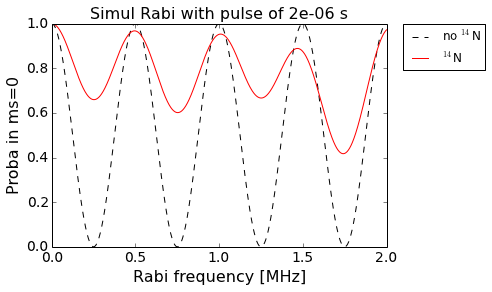

In [21]:
from analysis.scripts.espin import simul_Rabi
reload(simul_Rabi)
simul_Rabi.sweep_pulse_ampl(pulse_duration =2000e-9, Rabi_freq_max =2e6, detuning = 0.e6)
#simul_Rabi.sweep_pulse_duration(pulse_duration_max = 4e-6, Rabi_freq = 0.26e6,detuning = 0e6)

d:\measuring\data\20150513\135608_GeneralDarkESR_Pippin_SIL1
d:\measuring\data\20150513\133756_AdwinSSRO_SSROCalibration_Pippin_SIL1
Center guess?2.8086e9


UnboundLocalError: local variable 'guess_x0' referenced before assignment

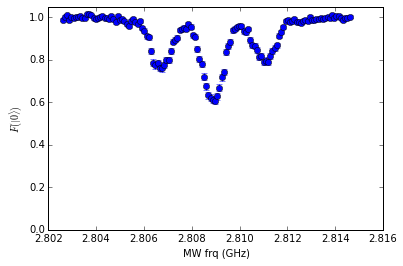

In [64]:
execfile(r'D:\measuring\analysis\scripts\espin\dark_esr_analysis.py')

In [4]:
from analysis.scripts.espin import analysis_espin_calibration as aec
reload(aec)
folder = toolbox.latest_data('DarkESR')
test=aec.analyse_dark_esr()

Folder for the Dark ESR analysis :  d:\measuring\data\20150506\144407_PulsarDarkESR_Pippin_SIL1
d:\measuring\data\20140903\130113_AdwinSSRO_SSROCalibration_Pippin_SIL3
Could not find dip


d:\measuring\data
d:\measuring\data\20151215\101954_AdwinSSRO_SSROCalibration_Pippin_SIL1
[ 0.0687  0.0596  0.0533  0.0529  0.0527  0.0468  0.0462  0.0572  0.0568
  0.0628  0.0641]
min x =  0.928
min y = 0.0370527207284
d:\measuring\data\20151215\101954_AdwinSSRO_SSROCalibration_Pippin_SIL1
[ 0.0687  0.0596  0.0533  0.0529  0.0527  0.0468  0.0462  0.0572  0.0568
  0.0628  0.0641]
min x =  0.928
min y = 0.0370527207284
0.0405446014539
0.919874698795


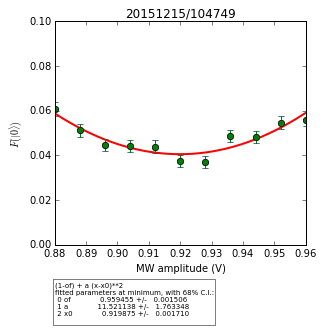

In [27]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Pi_Calibration')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
ymin=-0.0
ymax = 0.1
fit=calibration_tools.fit_parabolic(folder, x0_guess=0.92,a_guess=-2,of_guess=0.02, ax=ax, info_xy=(0.88,ymin-(ymax-ymin)*0.35))
#fit=calibration_tools.fit_parabolic(folder, x0_guess=1e-9,a_guess=-2e14,of_guess=0.02, ax=ax, info_xy=(-5e-9,-0.02))
fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
ax.set_ylim(ymin,ymax)
print 1-fit['params'][0]
print fit['params'][2]
#print 'Fitted minimum at ', fit['params'][2]

In [5]:
calibration_tools.fit_parabolic?

[ 0.58  0.6   0.62  0.64  0.66  0.68  0.7   0.72  0.74  0.76  0.78]
Converged with chi squared  0.00223638980929
degrees of freedom, dof  9
RMS of residuals (i.e. sqrt(chisq/dof))  0.0157634944282
Reduced chisq (i.e. variance of residuals)  0.000248487756588

fitted parameters at minimum, with 68% C.I.:
 0 m             -1.484580 +/-   0.075150
 1 x0             0.696769 +/-   0.003312

correlation matrix:
               m         x0        
         m  1.000000
        x0  0.256287  1.000000



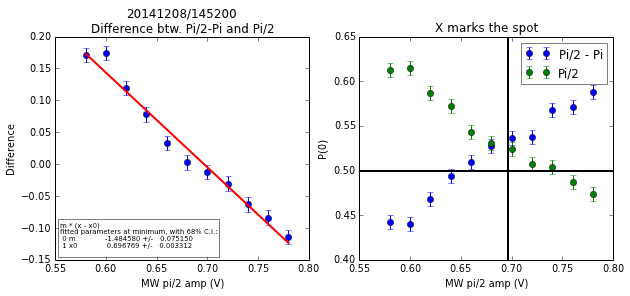

In [22]:
execfile(r'D:\measuring\analysis\scripts\espin\calibration_pi2_CORPSE.py')

In [28]:
print sqrt(sin(pi/4.))


0.840896415254


In [38]:
execfile(r'D:\measuring\analysis\scripts\espin\electron_ramsey_analysis.py')

IOError: unable to open file (File accessibilty: Unable to open file)

64
25.6
[ 0.01960362  0.11654459  0.2641103   0.43214132  0.57539854  0.61956053
  0.56570444  0.45368376  0.29750108  0.18763464  0.06376562  0.05407152
  0.12085308  0.23071952  0.38151659  0.48168893  0.55924171  0.55708746
  0.52908229  0.43429556  0.31042654  0.21563981  0.15855235  0.17686342
  0.25764757  0.31796639  0.3772081   0.5         0.56031883  0.51938819
  0.4655321   0.41383025  0.3427402   0.32227488  0.30611805  0.33520034
  0.38367083  0.44291254  0.47414907  0.49461439  0.51938819  0.51507971
  0.4903059   0.48707454  0.46660922  0.44506678  0.45691512  0.50646273
  0.52692805  0.51938819  0.52046532  0.51938819  0.46445498  0.4903059
  0.50430849  0.544162    0.5538561   0.56247307  0.58724688  0.53877639
  0.58078414  0.51723395  0.47845756  0.45368376  0.49892288  0.50107712
  0.53985351  0.588324    0.60663507  0.63140888  0.57432141  0.5786299
  0.53662215  0.47414907  0.48061181  0.43214132  0.48815166  0.5538561
  0.57539854  0.59694097  0.62925463  0.673416

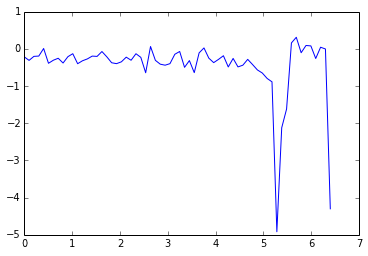

In [296]:
ramsey_fft=np.fft.fft(a.p0)
N_pts_fft = len(a.sweep_pts)/2
ramsey_fft_freq = np.linspace(0,0.5/(a.sweep_pts[-1]/float(N_pts_fft)),N_pts_fft)*1e3
#ramsey_fft_freq = np.fft.fftfreq(a.sweep_pts.shape[-1])
print N_pts_fft
fig,ax=plt.subplots(1,1)
#plt.plot(ramsey_fft_freq[N_pts_fft:], ramsey_fft.real[N_pts_fft:])
plt.plot(ramsey_fft_freq, ramsey_fft.real[N_pts_fft:])
#ax.set_ylim([0,4])
print 1/(a.sweep_pts[-1]/len(a.sweep_pts))*1e3


In [80]:
4/8.

0.5

IndexError: list index out of range

ERROR: Fit did not converge !


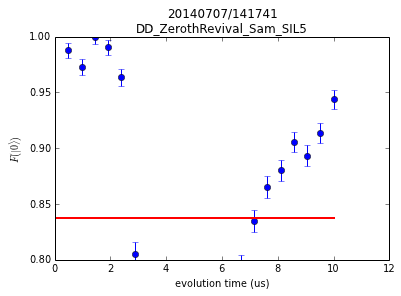

In [7]:
from analysis.scripts.espin import simpledecoupling_analysis as s
reload(s)
result=s.electron_T2_anal( measurement_name=['ssro'], ylim=(0.8,1))
print '{:.3f} +/- {:.3f}'.format(result[0]['params'][1]+ result[0]['params'][2],result[0]['error'][1]+ result[0]['error'][2])

In [147]:
a=arange(10)*3
a=a[0:2]
print a

[0 3]


In [1]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('135925')
fit=calibration_tools.fit_parabolic(folder, x0_guess=-30,a_guess=2.)
fit_result=calibration_tools.plot_result(folder, ret=True)
print 'Fitted maximum at ', fit['params'][2], 'us'
print ' {:.3f} +/- {:.3f}'.format(1-fit['params'][0]+fit['params'][1], np.sqrt(fit['error'][0]**2+fit['error'][1]**2))

ImportError: No module named analysis.scripts.bell

fitting with 0 splittings


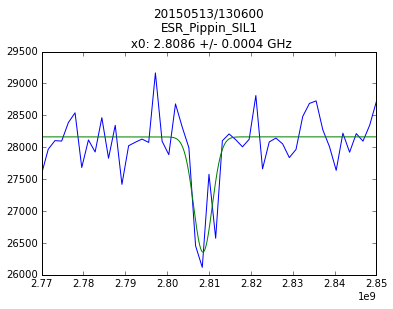

In [56]:
execfile(r'D:\measuring\analysis\scripts\espin\simple_esr_fit.py')

()
number 13C split .  0
()
number 13C split .  0


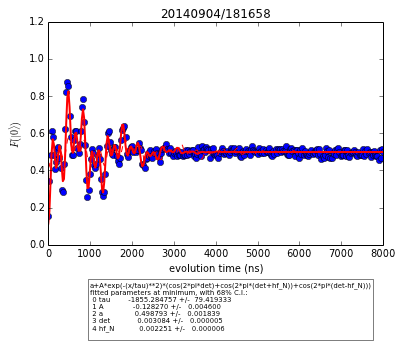

In [80]:
from analysis.lib.fitting import fit, ramsey
from analysis.lib.tools import plot
reload(ramsey)

ssro_calib_folder = toolbox.latest_data(contains='130113_AdwinSSRO_SSROCalibration') 
folder= tb.latest_data('')
a = sequence.SequenceAnalysis(folder)

a.get_sweep_pts()
a.get_readout_results('ssro')
a.get_electron_ROC(ssro_calib_folder=ssro_calib_folder)
x= a.sweep_pts
y=a.p0

tau = 4000      # ns
amplitude = -0.03       # amplitude
offset = 0.5        # offset
detuning = 3.0e-3 # in GHz
hf_N = 2.19e-3  # 14N hyperfine splitting in GHz
#hf_C = 0.858e-3   # 13C hyperfine splitting in GHz as **kw



fit_result = fit.fit1d(x,y,ramsey.fit_ramsey_14N_fixed_13C_opt,tau, amplitude, offset,detuning,hf_N, ret=True)
params_0, fitfunc_0, fitfunc_str= ramsey.fit_ramsey_14N_fixed_13C_opt(tau, amplitude, offset,detuning,hf_N)
test=fitfunc_0(x)
plot.plot_fit1d(fit_result,x,info_xy=(1000,-0.5))
ax=gca()
plt.plot(x, fitfunc_0(x), 'r--')
ax.set_ylim(0,1.2)
ax.set_title(a.timestamp)
ax.set_ylabel(r'$F(|0\rangle)$')
ax.set_xlabel(a.sweep_name)

file = open("ramsey_121606.txt", "w")

file.write("data")

file.write(x)

file.close()


In [65]:
savetxt('ramsey_130414_x.txt', x)

d:\measuring\data\20140903\125735_GeneralElectronRamsey_Pippin_SIL3

pi pulse at 0.012 for .
MW_pulse_amplitudes (V)


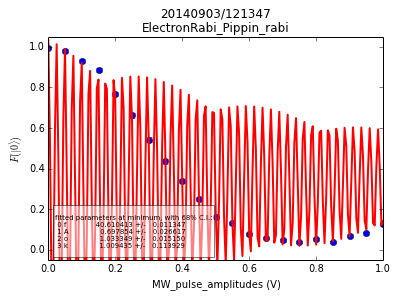

In [50]:
from analysis.scripts.espin import analysis_espin_calibration as aec
reload(aec)
folder = toolbox.latest_data('')
print folder
test = aec.analyse_Rabi(guess_frq =1/0.03 )

Converged with chi squared  0.00417461854001
degrees of freedom, dof  7
RMS of residuals (i.e. sqrt(chisq/dof))  0.0244207714281
Reduced chisq (i.e. variance of residuals)  0.000596374077144

fitted parameters at minimum, with 68% C.I.:
 0 o              0.465881 +/-   0.011014
 1 x0            73.971081 +/-   0.337561
 2 a             -0.411033 +/-   0.022399
 3 c              8.091095 +/-   0.567217

correlation matrix:
               o         x0        a         c         
         o  1.000000
        x0  0.000242  1.000000
         a -0.347843  0.000152  1.000000
         c  0.540336  0.000469  0.267454  1.000000

maximum at 73971080.9505  us


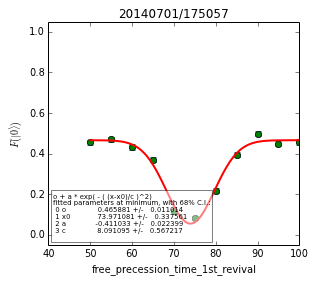

In [88]:
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('Bell')
a,ax,x,y=calibration_tools.plot_result(folder, ret=True)
fit_result =calibration_tools.fit_gaussian(folder, ax=ax, x0_guess = 75,c_guess = 20, a_guess= -0.5)
#ax.set_ylim([0.5,1.05])
print 'maximum at', fit_result['params'][1]*1e6, ' us'

##### Calibrate pi/4:

Converged with chi squared  0.00180257410744
degrees of freedom, dof  18
RMS of residuals (i.e. sqrt(chisq/dof))  0.0100071477439
Reduced chisq (i.e. variance of residuals)  0.000100143005969

fitted parameters at minimum, with 68% C.I.:
 0 a             -0.639804 +/-   0.029493
 1 b              1.102080 +/-   0.011284

correlation matrix:
               a         b         
         a  1.000000
         b -0.980140  1.000000

pi/4 (1/2.*(1+cos(pi/4.) at: 0.38844246534
error: 0.0210305952434


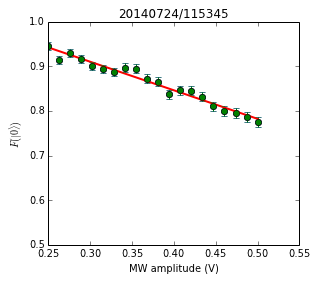

In [9]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')
from analysis.scripts.bell import calibration_tools
reload(calibration_tools)
folder=tb.latest_data('')
fig, ax = plt.subplots(1,1, figsize=(4.5,4))
fit=calibration_tools.fit_linear(folder, a_guess = 1., b_guess=0., ax=ax)
fit_result=calibration_tools.plot_result(folder, ax=ax, ret=True)
ax.set_ylim(0.5,1)
print 'pi/4 (1/2.*(1+cos(pi/4.) at:',(1/2.*(1+cos(pi/4.))-fit['params_dict']['b'])/fit['params_dict']['a']
print 'error:',sqrt((1/2.*(1+cos(pi/4.))-fit['params_dict']['b'])**2/fit['params_dict']['a']**2*fit['error_dict']['a']**2 + 1./fit['params_dict']['a']**2*fit['error_dict']['b']**2 )
